In [23]:
# Load required packages
library(alakazam)
library(dowser)
library(airr)
library(dplyr)
library(ggtree)

# read the database
db <- read_airr("/home/phil/processed_docker/vac_docker/changeo_10x/vac_heavy_germ-pass.tsv")

In [24]:
clones <- formatClones(
db,
seq = "sequence_alignment",
clone = "clone_id",
subclone = "subclone_id",
nproc = 16,
chain = "H",
heavy = "IGH",
trait = "c_call",
cell = "cell_id",
locus = "locus",
minseq = 2,
split_light = FALSE,
majoronly = FALSE,
columns = NULL,
)

print(clones)

# A tibble: 4 x 4
  clone_id  data       locus  seqs
  <chr>     <list>     <chr> <int>
1 2550_1945 <airrClon> IGH       2
2 280_508   <airrClon> IGH       2
3 373_817   <airrClon> IGH       2
4 397_555   <airrClon> IGH       2


In [25]:
# Build maxmimum parsimony trees for first four clones using 
# phangorn package in R
trees <- getTrees(clones)

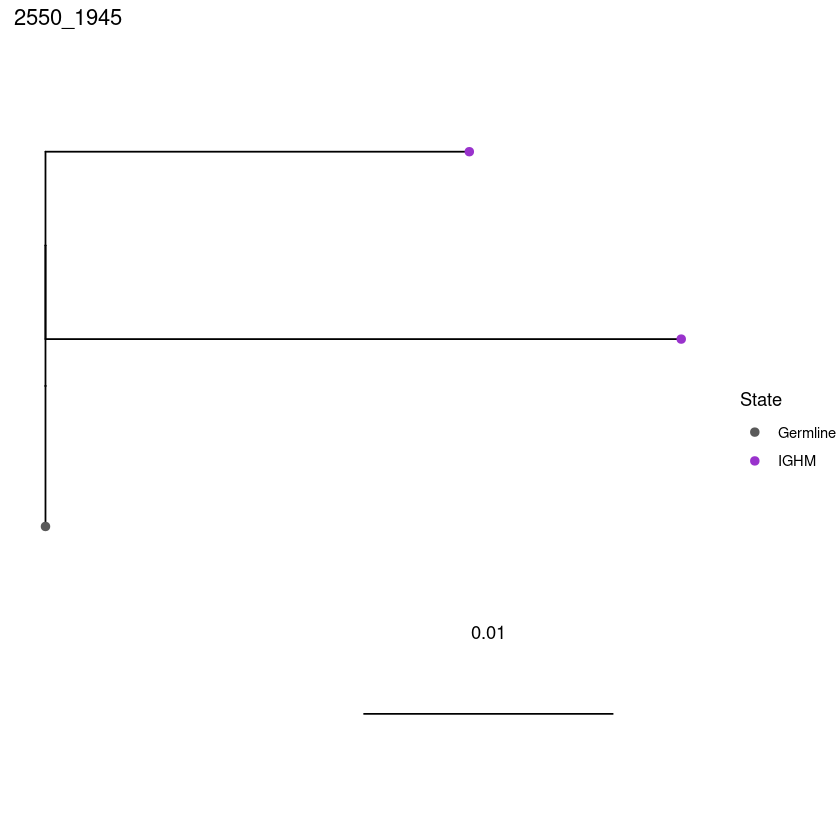

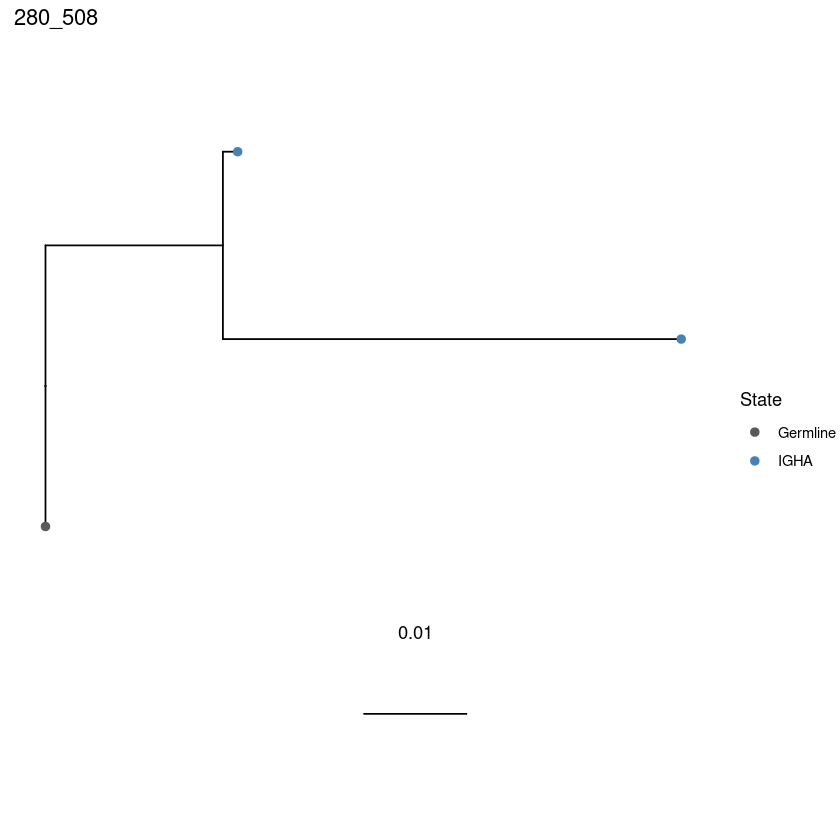

[[1]]

[[2]]

[[3]]

[[4]]


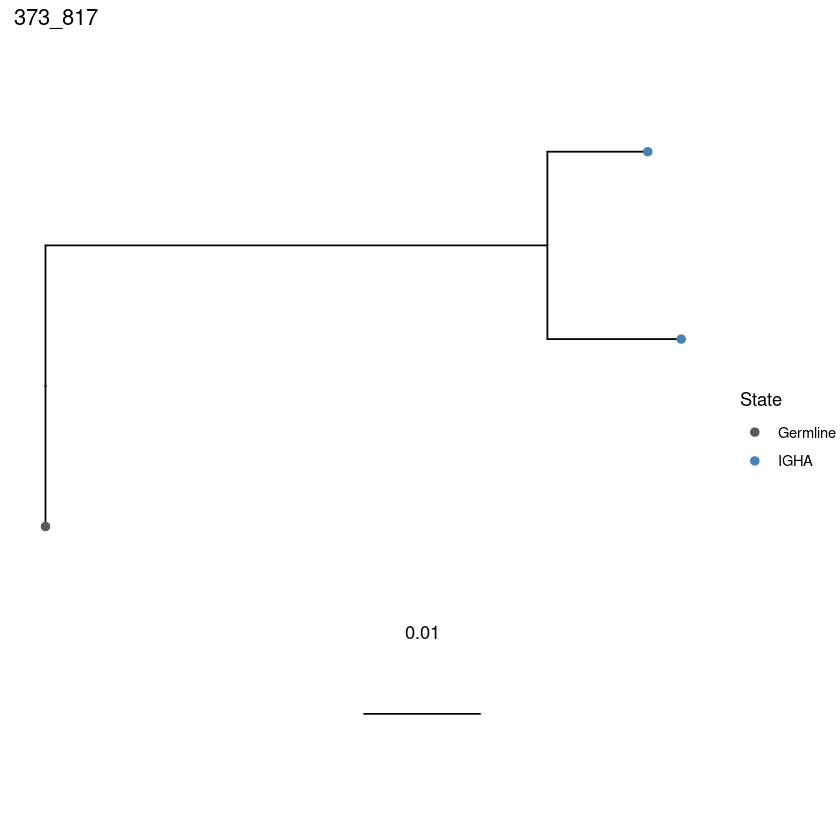

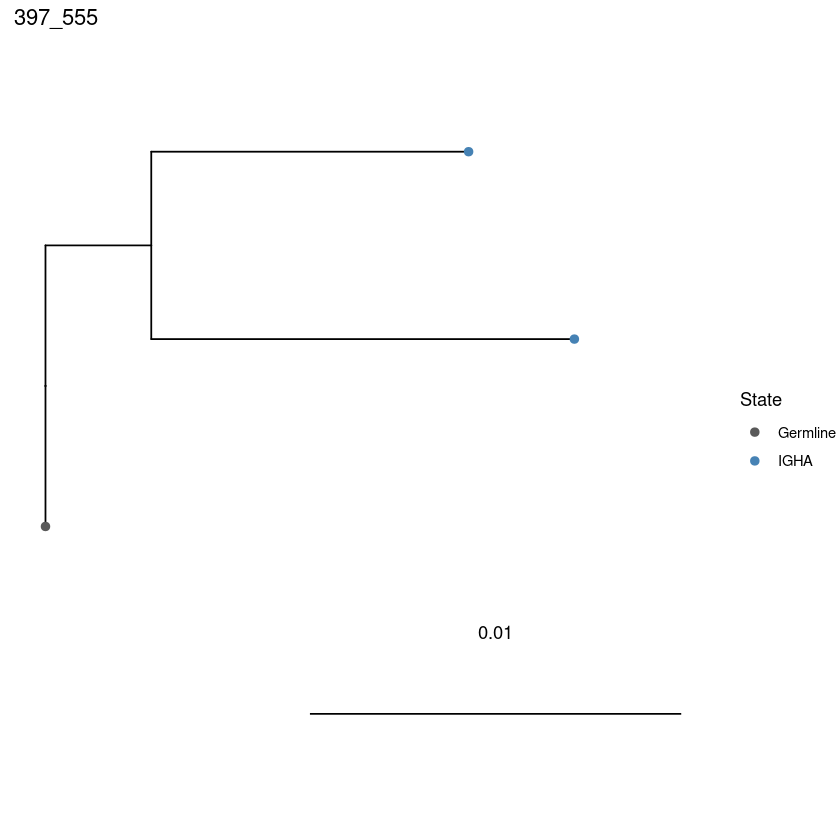

In [47]:
# or, specify a named palette vector
custom_palette=c("IGHA"="#E41A1C", "IGHG2C"="#377EB8", "IGHG3"="#0000FF", "IGHG2B"="#984EA3", "IGHG1"="#00FF00",
                 "IGHD"="#D95F02", "IGHM"="#4DAF4A", "Germline"="grey35")

isotype_colors <- c("IGHM"="darkorchid", "IGHD"="firebrick", "IGHA"="steelblue",
                    "IGHG1"="seagreen", "IGHG2B"="darkgreen", "IGHG2C"="orange",
                   "IGHG3"="darkgrey", "Germline"="grey35")

plots <- plotTrees(trees, tips= "c_call", tipsize=2, tip_palette=isotype_colors)
plots

$title
[1] "B cell tree"

attr(,"class")
[1] "labels"

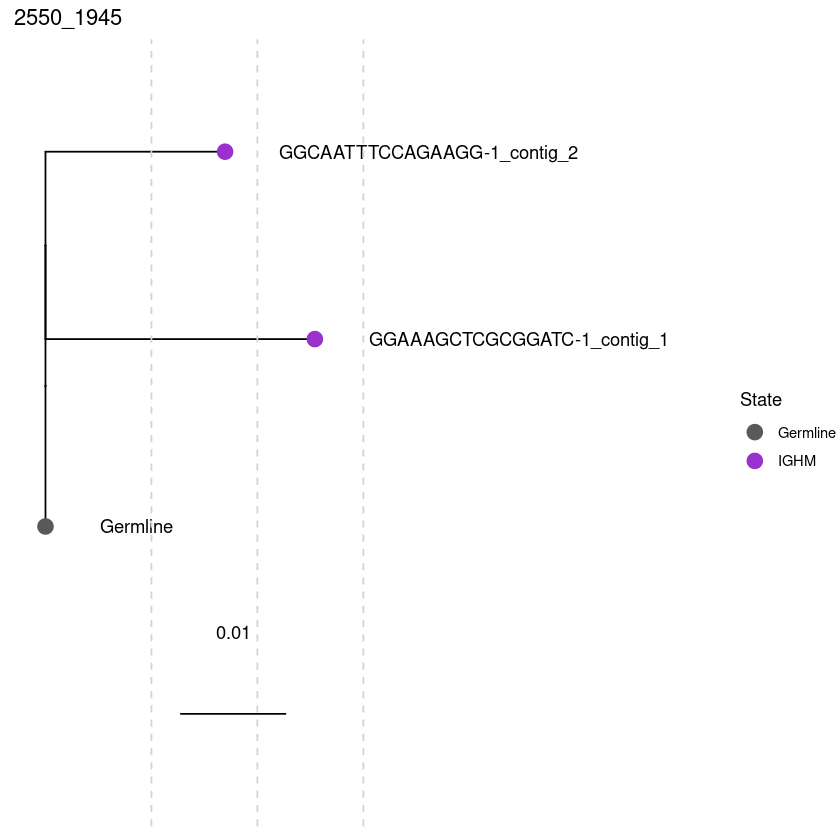

In [48]:
plots <- plotTrees(trees, tips="c_call", tipsize=4, tip_palette=isotype_colors)

treeplot <- plots[[1]] + geom_tiplab(offset=0.005) + 
geom_vline(xintercept=c(0.01, 0.02, 0.03), 
           linetype="dashed",color="lightgrey") + xlim(0,0.06)
ggtitle("B cell tree")

treeplot

In [28]:
# simple tree plotting with ggtree R package with isotypes at tips
scaleBranches(trees, edge_type = "mutations")

clone_id  data                                                    locus seqs
1 2550_1945 <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
2 280_508   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
3 373_817   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
4 397_555   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
  trees                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [29]:
clones$trees[[2]]$edge_type

Warning message:
“Unknown or uninitialised column: `trees`.”


NULL